In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  math as m
from linearRegression import *


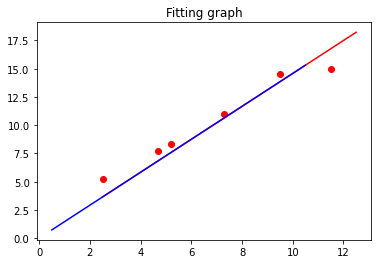

In [124]:
X_train = np.matrix([2.5, 4.7, 5.2, 7.3, 9.5, 11.5])
X_train = np.transpose(X_train)
Y_train = np.matrix([5.21, 7.70, 8.30, 11, 14.5, 15])
Y_train = np.transpose(Y_train)
theta1 = fitGD(X_train, Y_train, 0.01, 0.01, 1, 1000)
theta2=fitNormal(X_train, Y_train)
plt.title("Fitting graph")
plt.scatter(np.ravel(X_train),np.ravel(Y_train),color="red")
y = np.arange(start=2.5,stop=13.5,step=1)
x = float(theta1)
x = x*y 
y1 = np.arange(start=0.5,stop=11.5,step=1)
x1 = float(theta2)
x1 = x1*y1
print()
plt.plot(y,x,color="red")
# plt.show()
plt.plot(y1,x1,color="blue")
plt.show()


## Error handling

In [153]:

X_test = np.array([3.5, 5, 6, 8, 10 ])
Y_test = np.array([6.25, 8.2, 9.5, 12.1, 14.7])
X_train=np.array([2.5, 4.7, 5.2, 7.3, 9.5, 11.5])
Y_train=np.array([5.21, 7.70, 8.30, 11, 14.5, 15])
yt = np.mat(Y_train)
yte = np.mat(Y_test)

m = len(X_train)
J_train =np.array([])
J_test =np.array([])
la = np.array([])
for l in range(15):
    theta1 = fitGD(np.transpose(np.mat(X_train)),np.transpose(np.mat(Y_train)),0.01,l, 1,10000) 
    Y_pred_test = float(theta1)*X_test
    Y_pred_train=float(theta1)*X_train
    ypm = np.mat(Y_pred_train)
    ypme = np.mat(Y_pred_test)
    J_train = np.append(J_train,float(np.matmul((yt-ypm),np.transpose(yt-ypm)))/(2*m))
    J_test = np.append(J_test,float(np.matmul((yte-ypme),np.transpose(yte-ypme)))/(2*m))
    la = np.append(la,l)
    


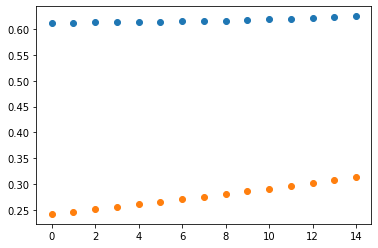

In [159]:
plt.scatter(la,J_train)
plt.scatter(la,J_test)
plt.show()


[0 1]
